<a href="https://colab.research.google.com/github/NosenkoArtem/Neural_Networks_and_CV/blob/master/Copy_of_module03_sin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset

In [0]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

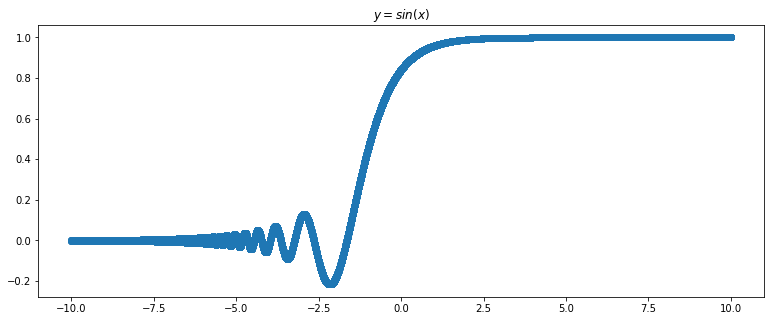

In [22]:
x_train = torch.rand(50000)
x_train = x_train * 20.0 - 10.0

y_train = target_function(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

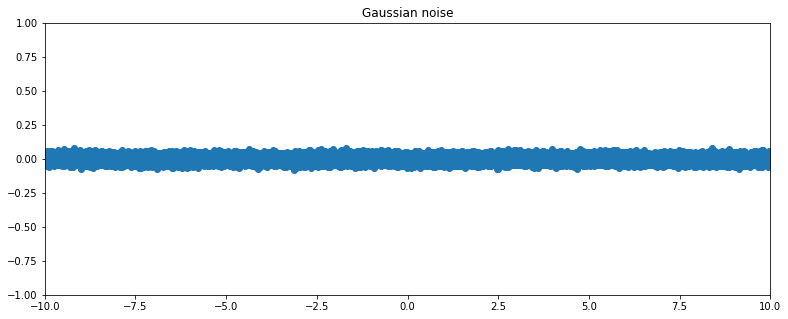

In [23]:
noise = torch.randn(y_train.shape) / 50

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

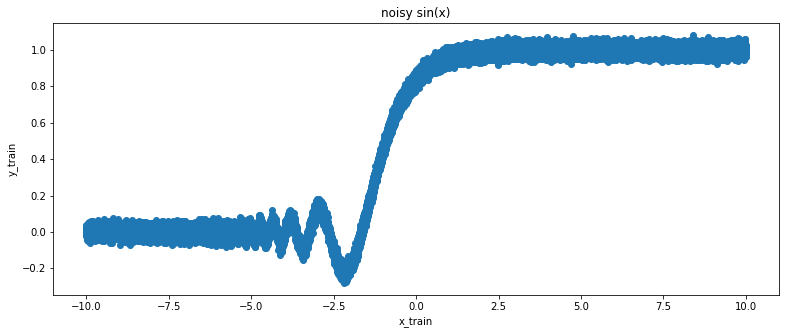

In [24]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [26]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

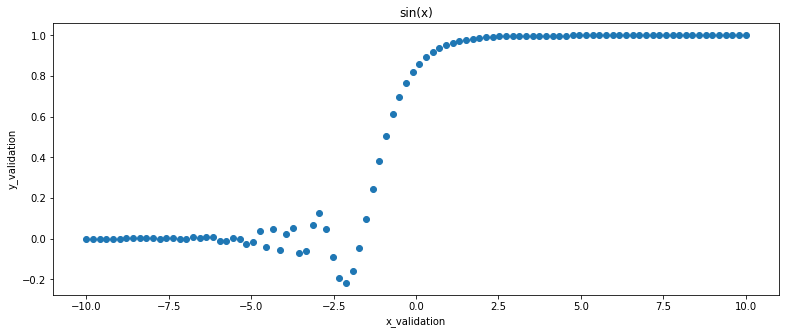

In [27]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = target_function(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [0]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 2*n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(2*n_hidden_neurons, n_hidden_neurons)
        self.act3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act4 = torch.nn.ReLU()
        self.fc5 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        return x

sine_net = SineNet(3)

In [0]:
pytorch_total_params = sum(p.numel() for p in sine_net.parameters())

In [31]:
pytorch_total_params

67

# Prediction

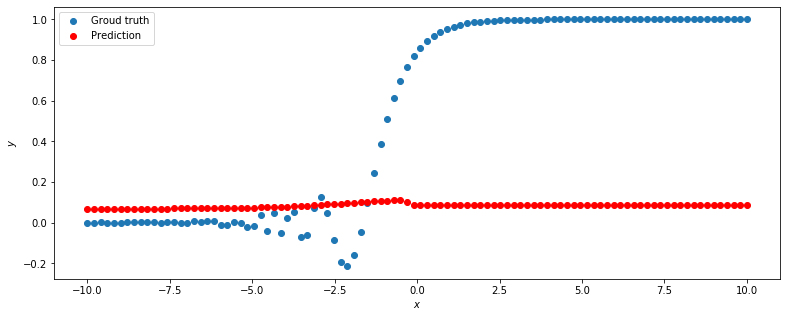

In [32]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# Optimizer

In [0]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.12)

# Loss function

In [0]:
def loss(pred, target):
    squares = 2*torch.abs(pred - target)+(pred-target)**2
    return squares.sum()

In [0]:
#loss = torch.nn.SmoothL1Loss()

# Training procedure

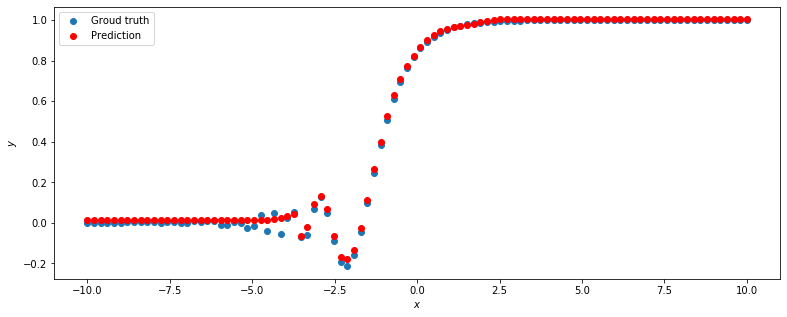

In [36]:
for epoch_index in range(20000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)